# 特征降维
- 什么是特征？  
    特征是描述对象的不同指标，所有特征合并在一起形成了对象的特征空间，此空间往往会是一个高维矩阵
    
降维算法中的”降维“，指的是降低特征矩阵中特征的数量。降维的目的是为了让算法运算更快，效果更好，并且可以帮助进行特征可视化，以更好的理解数据分布规律。

## SVD和PCA
SVD和主成分分析PCA都属于矩阵分解算法中的入门算法，都是通过分解特征矩阵来进行降维，基本是利用线性代数的矩阵性质进行降维和矩阵变换，其数学原理请参看相关论文。

在降维过程中，会减少特征的数量，这意味着删除数据，数据量变少则表示模型可以获取的信息会变少，模型 的表现可能会因此受影响。同时，在高维数据中，必然有一些特征是不带有有效的信息的(比如噪音)，或者有一些特征带有的信息和其他一些特征是重复的(比如一些特征可能会线性相关)。我们希望能够找出一种办法来帮助我们衡量特征上所带的信息量，让我们在降维的过程中，能够即减少特征的数量，又保留大部分有效信息——将带有重复信息的特征合并，并删除那些带无效信息的特征等等——逐渐创造出能够代表原特征矩阵大部分信息 的，特征更少的，新特征矩阵。

考虑之前讲到的特征选择中的方差过滤。如果一个特征的方差很小，则意味着这个特征上很可能有大量取值都相同(比如90%都是1，只有10%是0，甚至100%是1)，那这一个特征的取值对样本而 言就没有区分度，这种特征就不带有有效信息。从方差的这种应用就可以推断出，如果一个特征的方差很大，则说 明这个特征上带有大量的信息。因此，在降维中，PCA使用的信息量衡量指标，就是样本方差，又称可解释性方差，方差越大，特征所带的信息量越多。
$$
    Var = \frac{1}{n-1}\Sigma_{i=1}^n(x_i - x_{mean})^2
$$
- 思考  
    PCA之前需要对数据做什么预处理？  
    方差计算公式中为什么除数是n-1?

### 怎么降维
<img src='./03.jpg' width='800'/>
在数学原理中，无论是PCA和SVD都需要遍历所有的特征和样本来计算信息量指标。并且在矩阵分解的过程之中， 会产生比原来的特征矩阵更大的矩阵，比如原数据的结构是(m,n)，在矩阵分解中为了找出最佳新特征空间V，可能 需要产生(n,n)，(m,m)大小的矩阵，还需要产生协方差矩阵去计算更多的信息。而现在无论是Python还是R，或者 其他的任何语言，在大型矩阵运算上都不是特别擅长，无论代码如何简化，我们不可避免地要等待计算机去完成这 个非常庞大的数学计算过程。因此，降维算法的计算量很大，运行比较缓慢，但无论如何，它们的功能无可替代。

class sklearn.decomposition.PCA (n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0,
iterated_power=’auto’, random_state=None)

In [1]:
#高维数据可视化
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
y = iris.target
X = iris.data 
X.shape

(150, 4)

In [2]:
#降维
pca = PCA(n_components=2)
pca = pca.fit(X)
X_dr = pca.transform(X)
X_dr.shape

(150, 2)

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

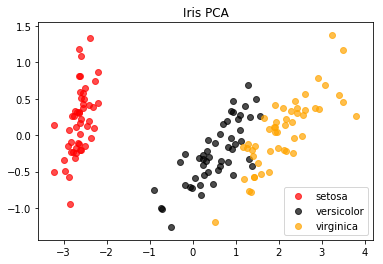

In [4]:
colors = ['red','black','orange']
plt.figure()
for i in range(3):
    plt.scatter(
        X_dr[y == i, 0],
        X_dr[y == i, 1],
        alpha = 0.7,
        c = colors[i],
        label = iris.target_names[i]
    )
plt.legend()
plt.title('Iris PCA')
plt.show()

In [5]:
#属性explained_variance_，查看降维后每个新特征向量上所带的信息量大小(可解释性方差的大小) 
pca.explained_variance_
#属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比 
#又叫做可解释方差贡献率
pca.explained_variance_ratio_
#大部分信息都被有效地集中在了第一个特征上
pca.explained_variance_ratio_.sum()

0.977685206318795

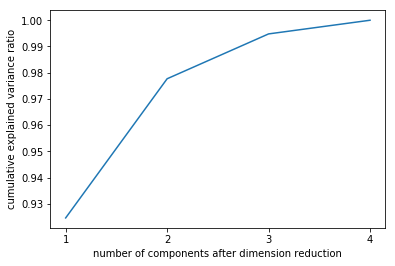

In [6]:
#选择最好的n_components:累积可解释方差贡献率曲线
import numpy as np
pca_line = PCA().fit(X) 
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_)) 
plt.xticks([1,2,3,4]) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction") 
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [7]:
#最大似然估计自选超参数
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)
X_mle
#可以发现，mle为我们自动选择了3个特征
pca_mle.explained_variance_ratio_.sum() 
# 得到了比设定2个特征时更高的信息含量，对于鸢尾花这个很小的数据集来说，
# 3个特征对应这么高的信息含量，并不需要去纠结于只保留2个特征，毕竟三个特征也可以可视化

0.9947878161267247

In [8]:
#按信息量占比选超参数
pca_f = PCA(n_components=0.97, svd_solver='full')
pca_f = pca_f.fit(X)
x_f = pca_f.transform(X)
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])

### 重要属性components_
用来存储经过矩阵计算后，得出的V(k,n)，是矩阵的新特征空间，是我们要将原始数据进行映射的那些新特征向量组成的矩阵。用来计算新的特征矩阵。

PCA与特征选择的区别：特征选择后的特征矩阵是可解读的，而PCA降维后的特征矩阵式不可解读的，PCA是将已存在的特征进行压缩，降维完毕后的特征不是原本的特征矩阵中的任何一个特征，而是通过某些方式组合起来的新特征。通常来说，在新的特征矩阵生成之前，我们无法知晓PCA都建立了怎样的新特征向量，新特征矩阵生成之后也不具有可读性，新特征虽 然带有原始数据的信息，却已经不是原数据上代表着的含义了。

但是其实，在矩阵分解时，PCA是有目标的:在原有特征的基础上，找出能够让信息尽量聚集的新特征向量。在 sklearn使用的PCA和SVD联合的降维方法中，这些新特征向量组成的新特征空间其实就是V(k,n)。


In [9]:
#通过人脸识别理解components_
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60) 
print(faces.images.shape)
print(faces.data.shape)

(760, 62, 47)
(760, 2914)


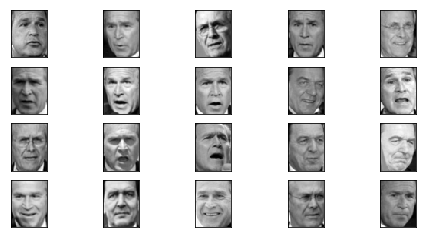

In [12]:
#数据本身是图像，和数据本身只是数字，使用的可视化方法不同

#创建画布和子图对象
fig, axes = plt.subplots(4,5 ,figsize=(8,4), subplot_kw = {"xticks":[],"yticks":[]})
#填充图像
for i,ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:] ,cmap="gray")

In [15]:
#尝试降维
X = faces.data
pca = PCA(n_components=150).fit(X)
V = pca.components_ #新的特征空间矩阵
V.shape

(150, 2914)

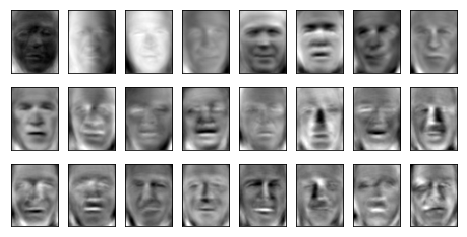

In [16]:
fig, axes = plt.subplots(3,8,figsize=(8,4),subplot_kw = {"xticks":[],"yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47),cmap='gray')

### 思考：V到底获得了什么？

### 重要接口inverse_transform
任何有inverse_transform这个接口的过程都是可逆的。在sklearn中，我们通过让原特征矩阵X右乘新特征空间矩阵V(k,n)来生成新特征矩阵X_dr，那理论上来说，让新特征矩阵X_dr右乘V(k,n)的逆矩阵，就可以将新特征矩阵X_dr还原为X

In [18]:
X_dr = pca.fit_transform(X)
X_inverse = pca.inverse_transform(X_dr)
X_inverse.shape

(760, 2914)

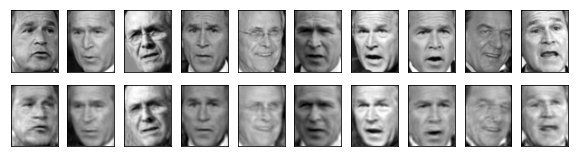

In [21]:
#降维会损失信息
fig, ax = plt.subplots(2,10,figsize=(10,2.5),subplot_kw={"xticks":[],"yticks":[]})
for i in range(10):
    ax[0,i].imshow(faces.images[i,:,:],cmap="binary_r")
    ax[1,i].imshow(X_inverse[i].reshape(62,47),cmap='binary_r')

In [23]:
#尝试利用pca完成手写数字识别的数据处理
import pandas as pd
data = pd.read_csv('./digit recognizor.csv')
X = data.iloc[:,1:]
y = data.iloc[:,0]
X.shape

(42000, 784)

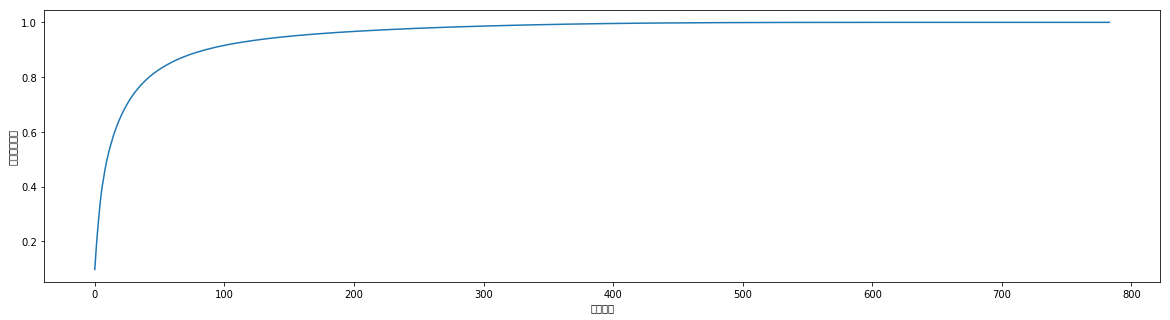

In [24]:
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("降维数目")
plt.ylabel("可解释性方差")
plt.show()

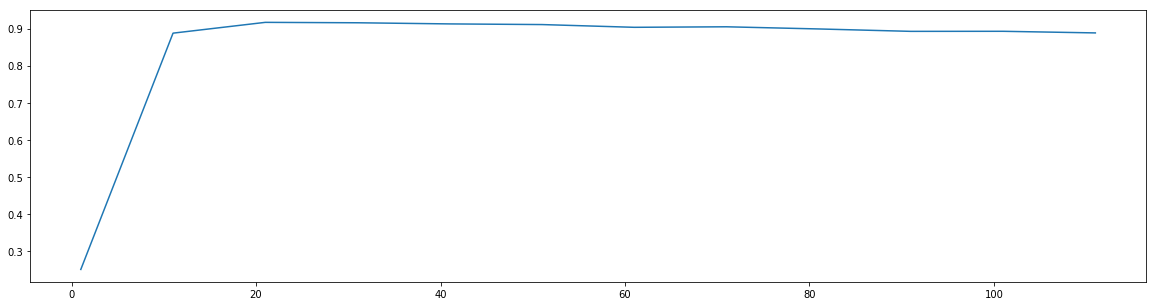

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
score = []
for i in range(1,121,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RandomForestClassifier(n_estimators=10,random_state=0,n_jobs=-1)
                           ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,121,10),score)
plt.show()

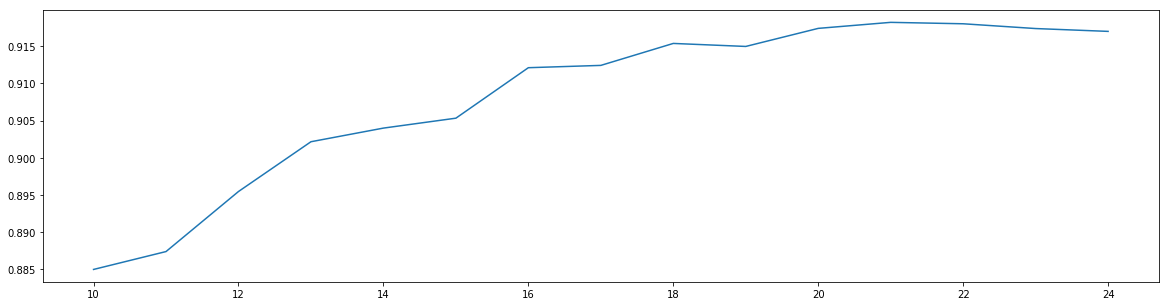

In [31]:
score = []
for i in range(10,25):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RandomForestClassifier(n_estimators=10,random_state=0,n_jobs=-1),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()


In [33]:
X_dr = PCA(22).fit_transform(X)
cross_val_score(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),X_dr,y,cv=5).mean()



0.9456671621401924

In [34]:
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(),X_dr,y,cv=5).mean()

0.9684756241278956

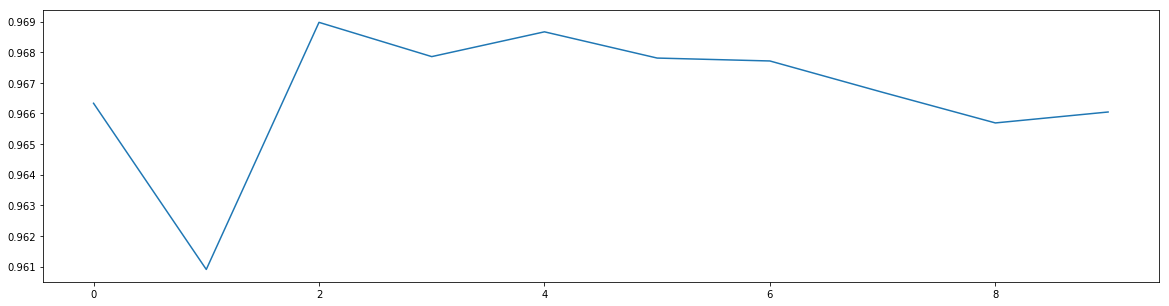

In [35]:
#对knn进行调参
score = []
for i in range(10):
    X_dr = PCA(22).fit_transform(X)
    once = cross_val_score(KNN(i+1),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()
 

In [38]:
 cross_val_score(KNN(4),X_dr,y,cv=5).mean()

0.9679755786718498

In [39]:
cross_val_score(KNN(3),X_dr,y,cv=5).mean()

0.9689517608116219